In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Latihan/Mall_Customers.csv", encoding='latin-1')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Gender Counts :
Female    112
Male       88
Name: Gender, dtype: int64


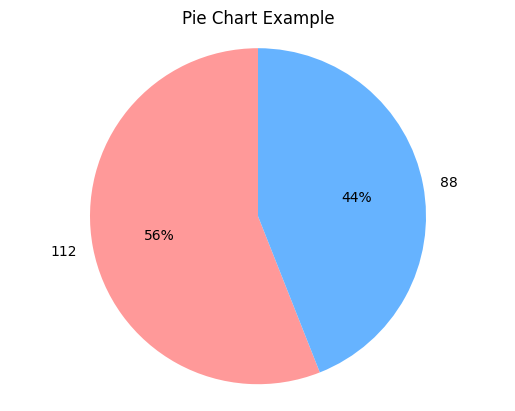

In [ ]:
gender_counts = df.Gender.value_counts()
print("Gender Counts :")
print(gender_counts)

plt.pie(gender_counts, labels=gender_counts, autopct='%1.0f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart Example')
plt.axis('equal')
plt.show()

In [ ]:
def kelompok_umur(umur):
  if umur <= 25:
    return '18 - 25'
  if umur <= 35:
    return '26 - 35'
  if umur <= 45:
    return '36 - 45'
  if umur <= 55:
    return '46 - 55'
  if umur <= 65:
    return '56 - 65'
  else:
    return "65+"

df['kelompok_umur'] = df['Age'].apply(kelompok_umur)

Kelompok Umur : 
     index  kelompok_umur
0  18 - 25             38
1  26 - 35             60
2  36 - 45             36
3  46 - 55             37
4  56 - 65             17
5      65+             12


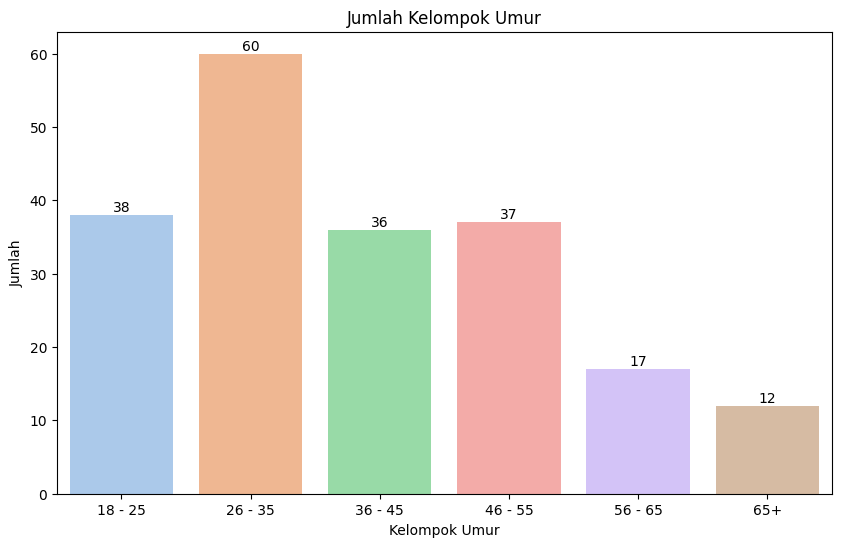

In [ ]:
kelompok_umur = df['kelompok_umur'].value_counts().sort_index().reset_index()
print("Kelompok Umur : ")
print(kelompok_umur)

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='index', y='kelompok_umur', data=kelompok_umur, palette='pastel')
for index, value in enumerate(kelompok_umur['kelompok_umur']):
    plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Jumlah Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
Y = df['CustomerID']

Silhouette Score untuk 2 Klaster: 0.2968969162503008
Silhouette Score untuk 3 Klaster: 0.46761358158775435
Silhouette Score untuk 4 Klaster: 0.4931963109249047
Silhouette Score untuk 5 Klaster: 0.553931997444648
Silhouette Score untuk 6 Klaster: 0.5379675585622219
Silhouette Score untuk 7 Klaster: 0.5264283703685728
Silhouette Score untuk 8 Klaster: 0.45704384633565154
Silhouette Score untuk 9 Klaster: 0.4563032021725485
Silhouette Score untuk 10 Klaster: 0.4492169169017592


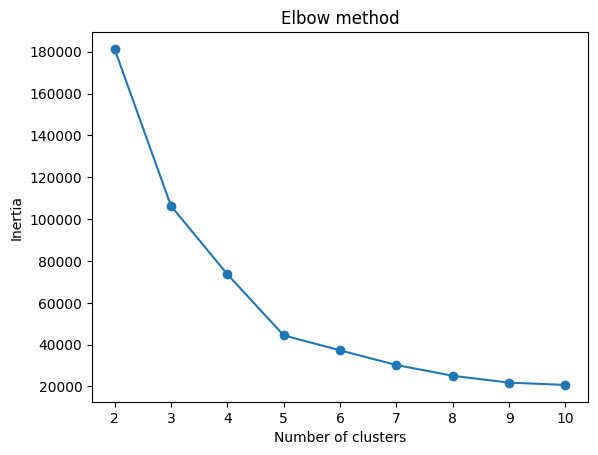

In [ ]:
inertias = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state = 0)
    kmeans.fit(X)
    df[f'kmeans_{i}'] = kmeans.labels_ + 1
    inertias.append(kmeans.inertia_)
    silhouette_avg_i = silhouette_score(X, kmeans.labels_)
    print(f'Silhouette Score untuk {i} Klaster: {silhouette_avg_i}')

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

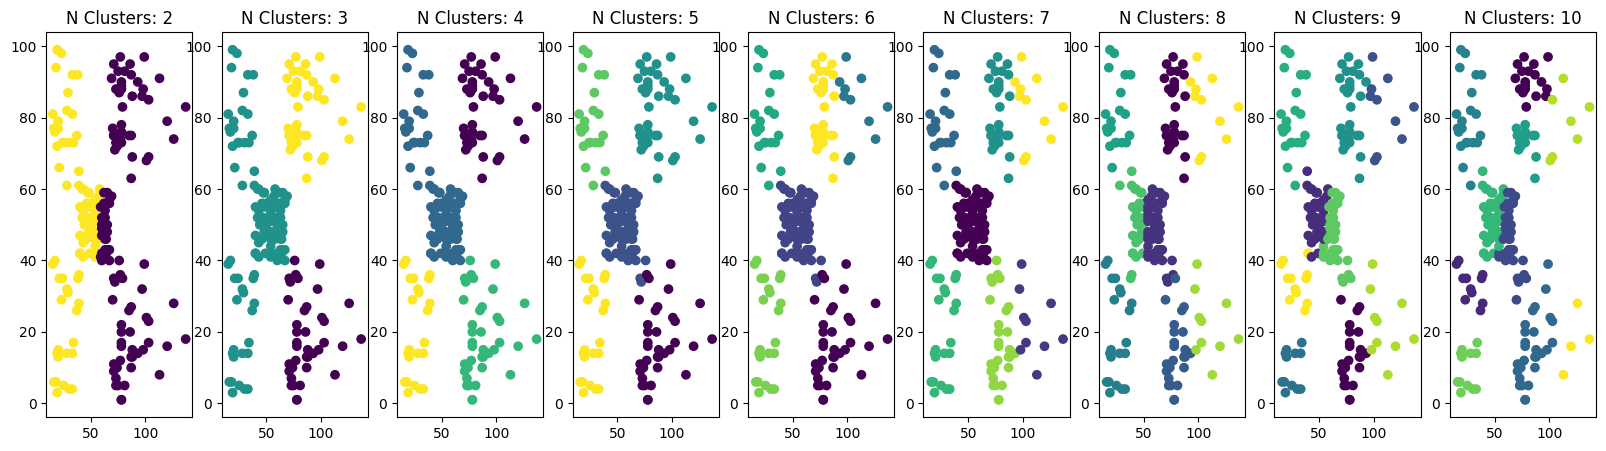

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df[f'kmeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

plt.show()

In [ ]:
kmeans_5 = KMeans(n_clusters=5, n_init=10, random_state = 0)
kmeans_5.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

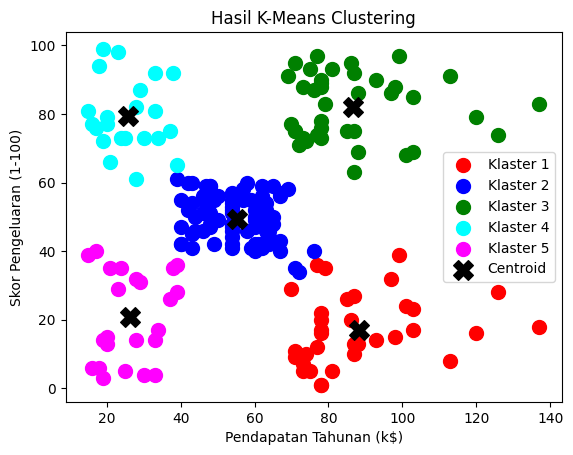

In [ ]:
plt.scatter(df.loc[df['kmeans_5'] == 1, 'Annual Income (k$)'], df.loc[df['kmeans_5'] == 1, 'Spending Score (1-100)'], s=100, c='red', label='Klaster 1')
plt.scatter(df.loc[df['kmeans_5'] == 2, 'Annual Income (k$)'], df.loc[df['kmeans_5'] == 2, 'Spending Score (1-100)'], s=100, c='blue', label='Klaster 2')
plt.scatter(df.loc[df['kmeans_5'] == 3, 'Annual Income (k$)'], df.loc[df['kmeans_5'] == 3, 'Spending Score (1-100)'], s=100, c='green', label='Klaster 3')
plt.scatter(df.loc[df['kmeans_5'] == 4, 'Annual Income (k$)'], df.loc[df['kmeans_5'] == 4, 'Spending Score (1-100)'], s=100, c='cyan', label='Klaster 4')
plt.scatter(df.loc[df['kmeans_5'] == 5, 'Annual Income (k$)'], df.loc[df['kmeans_5'] == 5, 'Spending Score (1-100)'], s=100, c='magenta', label='Klaster 5')

plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=200, c='black', label='Centroid', marker='X')

plt.title('Hasil K-Means Clustering')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend()
plt.show()


cluster : 
   index  count
0      1     35
1      2     81
2      3     39
3      4     22
4      5     23


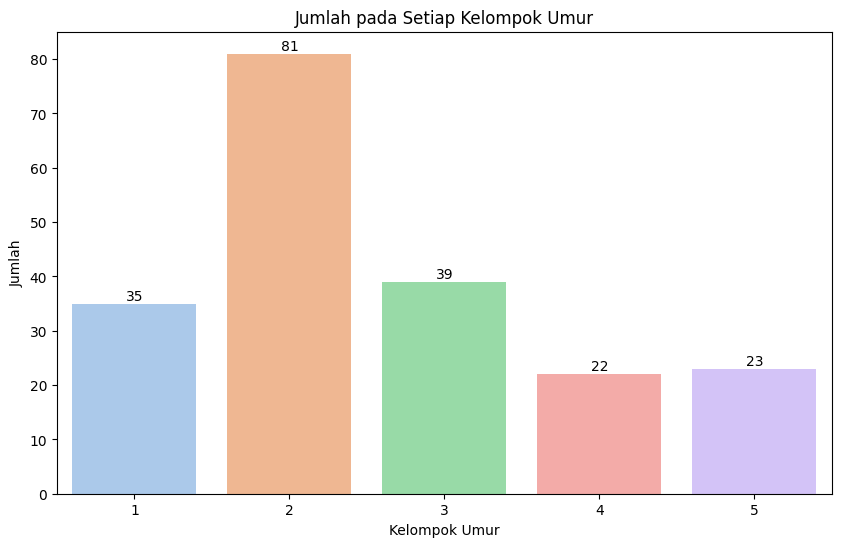

In [ ]:
cluster = df['kmeans_5'].value_counts().sort_index().reset_index()
cluster.columns = ['index', 'count']
print("cluster : ")
print(cluster)

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='index', y='count', data=cluster, palette='pastel')
for index, value in enumerate(cluster['count']):
    plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Jumlah pada Setiap Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
cluster_1 = df[df['kmeans_5'] == 1][['CustomerID', 'kmeans_5']]

In [ ]:
for i in range(1, 6):
    cluster_i = df[df['kmeans_5'] == i][['CustomerID', 'kmeans_5']]
    data_i = pd.DataFrame(cluster_i)
    data_i.to_csv(f'cluster_{i}.csv', index=False)

In [ ]:
df.to_csv(f'data.csv', index=False)